# Ficha Prática Nº7

## Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels . regression . linear_model as sm

## Exercício 1 - Regressão Univariada

In [3]:
data = 'Dataset/Grade_Set_1.csv'

df = pd.read_csv(data)
print(df.head())

X = df[['Hours_Studied']]  # Variável independente 
y = df['Test_Grade']       # Variável dependente


   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression Model
model = LinearRegression()

# Trains
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print('R Squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


R Squared: 0.9570209080466029
Mean Absolute Error: 2.032608695652172
Root Mean Squared Error: 2.7987389139586822


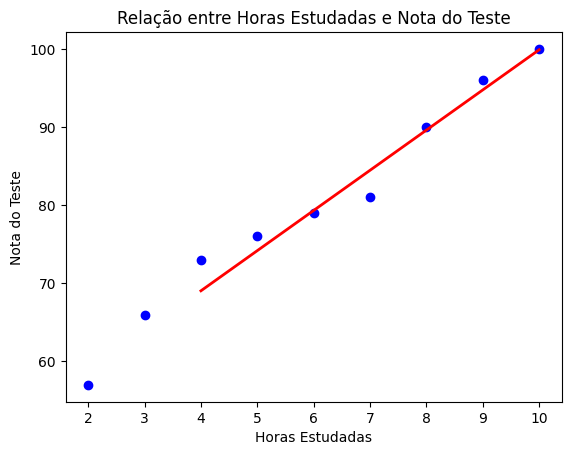

In [5]:
plt.scatter(X, y, color='blue')  # Plot dos dados reais
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Linha de regressão
plt.title('Relação entre Horas Estudadas e Nota do Teste')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota do Teste')
plt.show()

## Exercício 2 - Regressão Multivariada

[22.32939893 20.01966945 18.97134198 21.97579131 28.18253923 36.74110753
 46.80101799 57.5117924  68.02295254 77.48402019 85.04451715 89.85396519
 91.0618861 ]


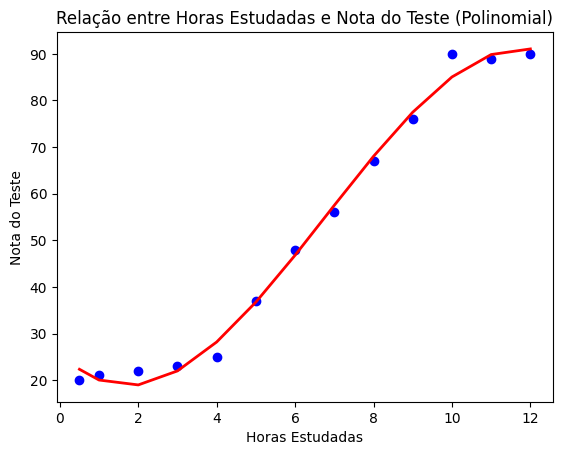

In [19]:
df = pd.read_csv('Dataset/Grade_Set_2.csv')

lr = LinearRegression()

x = df.Hours_Studied # independent variable
x = np.expand_dims(x, 1) # x is an array and we need a matrix

y = df.Test_Grade.values

degree = 3
model = make_pipeline( PolynomialFeatures(degree), lr )
model.fit (x, y)

# Verificar o resultado do ajuste
y_pred = model.predict(x)

print(y_pred)
plt.scatter(x, y, color='blue')  # Plot dos dados reais
plt.plot(x, y_pred, color='red', linewidth=2)  # Linha de regressão polinomial
plt.title('Relação entre Horas Estudadas e Nota do Teste (Polinomial)')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota do Teste')
plt.show()

# Exercício 3.1

R Squared: 0.687090508567519
Mean Absolute Error: 129402.10303364678
Root Mean Squared Error: 232397.2505812779


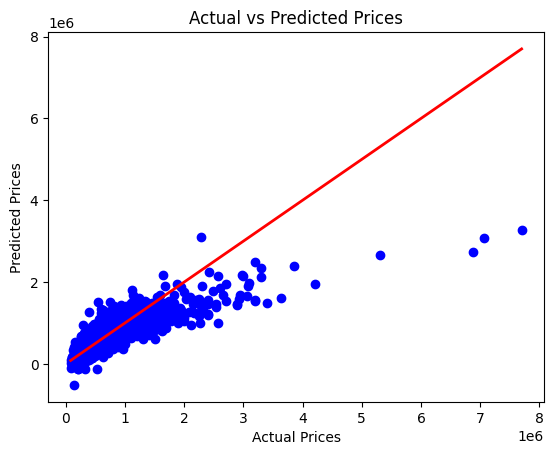

          Feature  Importance
15            lat   53.960615
6      waterfront   47.446433
9           grade    8.459445
7            view    4.548945
2       bathrooms    3.196808
8       condition    2.550195
5          floors    0.931173
0            date    0.009972
3     sqft_living    0.009347
10     sqft_above    0.006015
11  sqft_basement    0.003332
13   yr_renovated    0.001943
17  sqft_living15    0.001894
4        sqft_lot    0.000011
18     sqft_lot15   -0.000031
14        zipcode   -0.048235
12       yr_built   -0.221429
1        bedrooms   -2.826891
16           long  -18.029543


In [24]:
data = 'Dataset/kc_house_data.csv'

df = pd.read_csv(data)

# Convert the 'date' column to numerical format
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(pd.Timestamp.toordinal)

# Use the existing X and y variables
X = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print('R Squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Calculate feature importance
importance = model.coef_

# Convert importance to percentage
importance_percentage = 100.0 * (importance / importance.sum())

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_percentage
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Exercício 3.2

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2113.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:35:19   Log-Likelihood:            -2.0558e+05
No. Observations:               15129   AIC:                         4.112e+05
Df Residuals:                   15111   BIC:                         4.113e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
date              5.8977      4.677      1.261

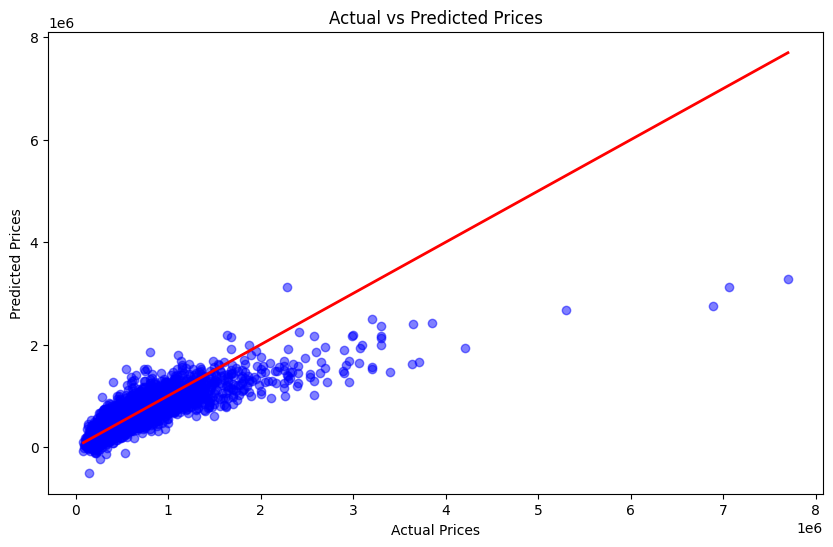

In [29]:

# # Convert the 'date' column to numerical format
# df['date'] = pd.to_datetime(df['date'])
# df['date'] = df['date'].map(pd.Timestamp.toordinal)

# # Use the existing X and y variables
# X = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# y = df['price']

# # using the list to select a subset
# X_train , X_test , y_train , y_test = train_test_split (X , y , train_size = .7 , random_state = 1 )
# # create a fitted model
# lm = sm.OLS(y_train,X_train).fit()
# # print summary
# print(lm.summary())

# # make predictions on the testing set
# y_train_pred = lm.predict(X_train)
# y_test_pred = lm.predict(X_test)
# y_pred = lm.predict(X)  # full data

# print('Train MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
# print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
# print('Test MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
# print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# plt.title('Actual vs Predicted Prices')
# plt.xlabel('Actual Prices')
# plt.ylabel('Predicted Prices')
# plt.show()
